In [47]:
import json

with open('TeacherChannel_data.txt') as f:
    data = json.load(f)

In [48]:
import pandas as pd

df = pd.DataFrame(data)


In [49]:
df.head()


,meta,data
users,"{'367333391793782804': {'name': 'frahlg', 'tag...",NaN
userindex,"[367333391793782804, 257595609387761664, 72095...",NaN
servers,"[{'name': 'Applied IoT course @ LNU', 'type': ...",NaN
channels,"{'812994924122996736': {'server': 0, 'name': '...",NaN
812994924122996736,NaN,"{'994950112725958717': {'u': 0, 't': 165728499..."


In [50]:
df.loc["channels","meta"]


{'812994924122996736': {'server': 0, 'name': '📚teacher-room', 'position': 10}}

In [64]:
df.loc["userindex","meta"]

['367333391793782804',
 '257595609387761664',
 '720956745194930197',
 '784419624744910919',
 '971047922609307649',
 '865885852266004501',
 '988724186153361408',
 '552999170005401600',
 '803193577818685460',
 '811358371004940289',
 '783697193470132254',
 '839156703470944297',
 '122739009611890688']

In [51]:
df.index

Index(['users', 'userindex', 'servers', 'channels', '812994924122996736'], dtype='object')

In [52]:
#rows = ['812994924122996736']
channel_info = df.loc["channels","meta"]
df_messages = pd.DataFrame()
 
df_m = pd.DataFrame(df.loc['812994924122996736','data'])
df_m = df_m.T
df_m['channel'] = channel_info['812994924122996736']['name']
df_messages = pd.concat([df_messages,df_m])

In [53]:
df_messages.head()

,u,t,m,e,r,re,a,te,channel
994950112725958717,0,1657284992153,I'm online now. So if anyone else wants to joi...,NaN,NaN,NaN,NaN,NaN,📚teacher-room
994951054561124442,1,1657285216704,"I'll be watching, not in shape to be on stream...",[{'url': 'https://statbot.net/dashboard/399864...,NaN,NaN,NaN,NaN,📚teacher-room
994963483999338497,0,1657288180113,Ah! Thanks!,NaN,NaN,NaN,NaN,NaN,📚teacher-room
994963510150844487,0,1657288186348,Didn't see this until now ...,NaN,NaN,NaN,NaN,NaN,📚teacher-room
994963514374488164,0,1657288187355,bummer,NaN,NaN,NaN,NaN,NaN,📚teacher-room


In [54]:
len(df_messages)

491

## Clean Data from HTML

In [55]:
from bs4 import BeautifulSoup
import warnings

def clean_html(text):
    warnings.filterwarnings("ignore", category=UserWarning, module='bs4')
    soup = BeautifulSoup(str(text), "html.parser")

    txt=soup.text # remove html tags
    txt = txt.lower()
   
    return txt

df_messages['message'] = df_messages['m'].apply(clean_html)

In [56]:

df_messages.head()

,u,t,m,e,r,re,a,te,channel,message
994950112725958717,0,1657284992153,I'm online now. So if anyone else wants to joi...,NaN,NaN,NaN,NaN,NaN,📚teacher-room,i'm online now. so if anyone else wants to joi...
994951054561124442,1,1657285216704,"I'll be watching, not in shape to be on stream...",[{'url': 'https://statbot.net/dashboard/399864...,NaN,NaN,NaN,NaN,📚teacher-room,"i'll be watching, not in shape to be on stream..."
994963483999338497,0,1657288180113,Ah! Thanks!,NaN,NaN,NaN,NaN,NaN,📚teacher-room,ah! thanks!
994963510150844487,0,1657288186348,Didn't see this until now ...,NaN,NaN,NaN,NaN,NaN,📚teacher-room,didn't see this until now ...
994963514374488164,0,1657288187355,bummer,NaN,NaN,NaN,NaN,NaN,📚teacher-room,bummer


## Sentiment analysis with TextBlob

In [57]:
from textblob import TextBlob

df_messages['sentiment'] = df_messages['message'].apply(lambda msg: TextBlob(str(msg)).sentiment.polarity)


In [87]:
df_messages['timestamp'] = pd.to_datetime(df_messages['t'].astype(int), unit='ms', errors = 'coerce')

start_date='2021-05-01'
df_messages= df_messages[df_messages['timestamp']>start_date]

In [88]:
df_messages.set_index('timestamp', inplace=True)

In [89]:
df_messages

,u,t,m,e,r,re,a,te,channel,message,sentiment
timestamp,,,,,,,,,,,
2022-07-08 12:56:32.153,0,1657284992153,I'm online now. So if anyone else wants to joi...,NaN,NaN,NaN,NaN,NaN,📚teacher-room,i'm online now. so if anyone else wants to joi...,0.250000
2022-07-08 13:00:16.704,1,1657285216704,"I'll be watching, not in shape to be on stream...",[{'url': 'https://statbot.net/dashboard/399864...,NaN,NaN,NaN,NaN,📚teacher-room,"i'll be watching, not in shape to be on stream...",0.285714
2022-07-08 13:49:40.113,0,1657288180113,Ah! Thanks!,NaN,NaN,NaN,NaN,NaN,📚teacher-room,ah! thanks!,0.250000
2022-07-08 13:49:46.348,0,1657288186348,Didn't see this until now ...,NaN,NaN,NaN,NaN,NaN,📚teacher-room,didn't see this until now ...,0.000000
2022-07-08 13:49:47.355,0,1657288187355,bummer,NaN,NaN,NaN,NaN,NaN,📚teacher-room,bummer,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2021-06-04 10:40:55.118,9,1622803255118,"hi, last week of june is complicated to me bec...",NaN,NaN,NaN,NaN,NaN,📚teacher-room,"hi, last week of june is complicated to me bec...",-0.125000
2021-06-05 06:59:05.833,0,1622876345833,Sure! We can move around without limits. 🙂,NaN,850323225153896448,NaN,NaN,NaN,📚teacher-room,sure! we can move around without limits. 🙂,0.625000
2021-06-06 07:58:08.248,9,1622966288248,"OK, thanks! So I see week 27 has empty spots, ...",NaN,850629789831528508,NaN,NaN,NaN,📚teacher-room,"ok, thanks! so i see week 27 has empty spots, ...",0.216667


timestamp
2022-07-08 12:56:32.153    Positive
2022-07-08 13:00:16.704    Positive
2022-07-08 13:49:40.113    Positive
2022-07-08 13:49:46.348    Positive
2022-07-08 13:49:47.355    Positive
                             ...   
2021-06-04 10:40:55.118    Negative
2021-06-05 06:59:05.833    Positive
2021-06-06 07:58:08.248    Positive
2021-06-06 12:14:23.585    Positive
2021-06-06 13:22:14.736    Positive
Name: sentiment_group, Length: 488, dtype: object


/var/folders/bl/02tnlb3j63n87b_hctf4mh380000gq/T/ipykernel_19079/1549365376.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_messages['sentiment_group'] = df_messages['sentiment'].apply(lambda s: 'Positive' if s >= 0 else 'Negative')


<AxesSubplot: xlabel='timestamp'>

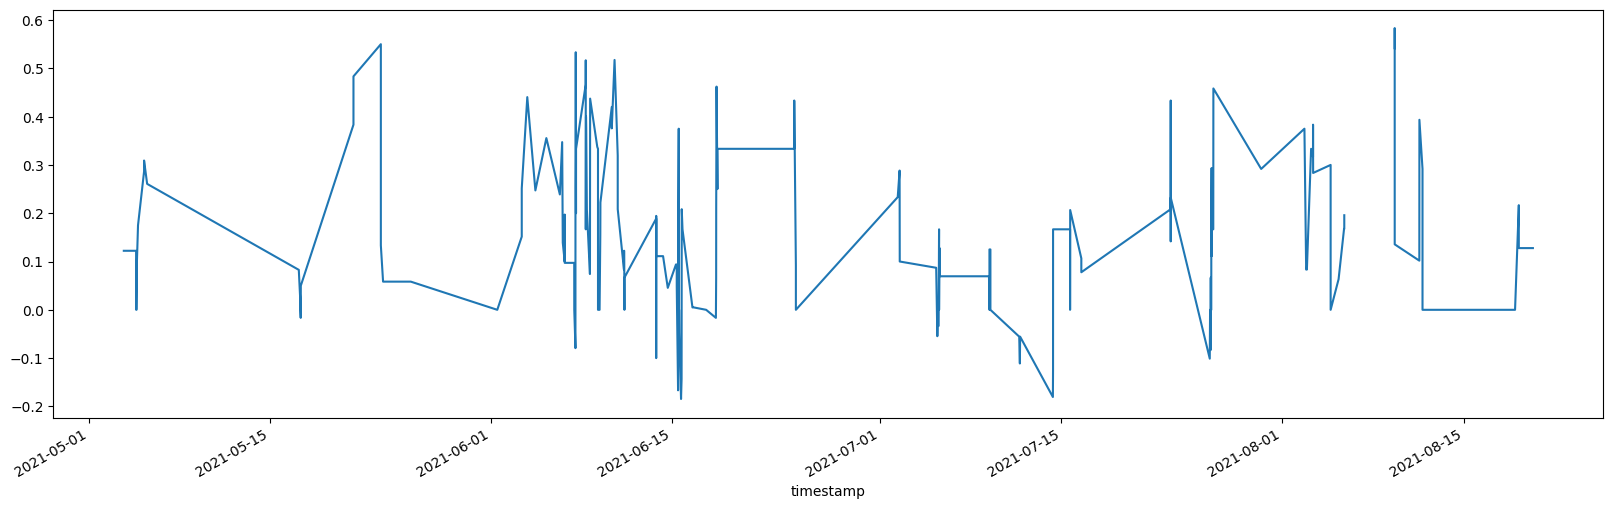

In [113]:
#import matplotlib.pyplot as plt

#plt.figure(figsize=(20,10))
#df_messages['sentiment'].resample('D').mean().rolling(window=1).mean().plot()

import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(20, 6))

df_messages['sentiment_group'] = df_messages['sentiment'].apply(lambda s: 'Positive' if s >= 0 else 'Negative')

print (df_messages['sentiment_group'])

                                                             
sentiment_resampled = df_messages[df_messages.index.year == 2021]

# Resample the 'sentiment' column by day, calculate the mean, and then apply a rolling mean with a window of 7
sentiment_resampled = sentiment_resampled['sentiment'].rolling(window=3).mean()


# Drop rows with missing values (NaNs)
#sentiment_resampled = sentiment_resampled.dropna()


# Plot the sentiment data
sentiment_resampled.plot()

## Binary Categorization

/var/folders/bl/02tnlb3j63n87b_hctf4mh380000gq/T/ipykernel_19079/1672663415.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_messages['sentiment_group'] = df_messages['sentiment'].apply(lambda s: 'Positive' if s >= 0 else 'Negative')


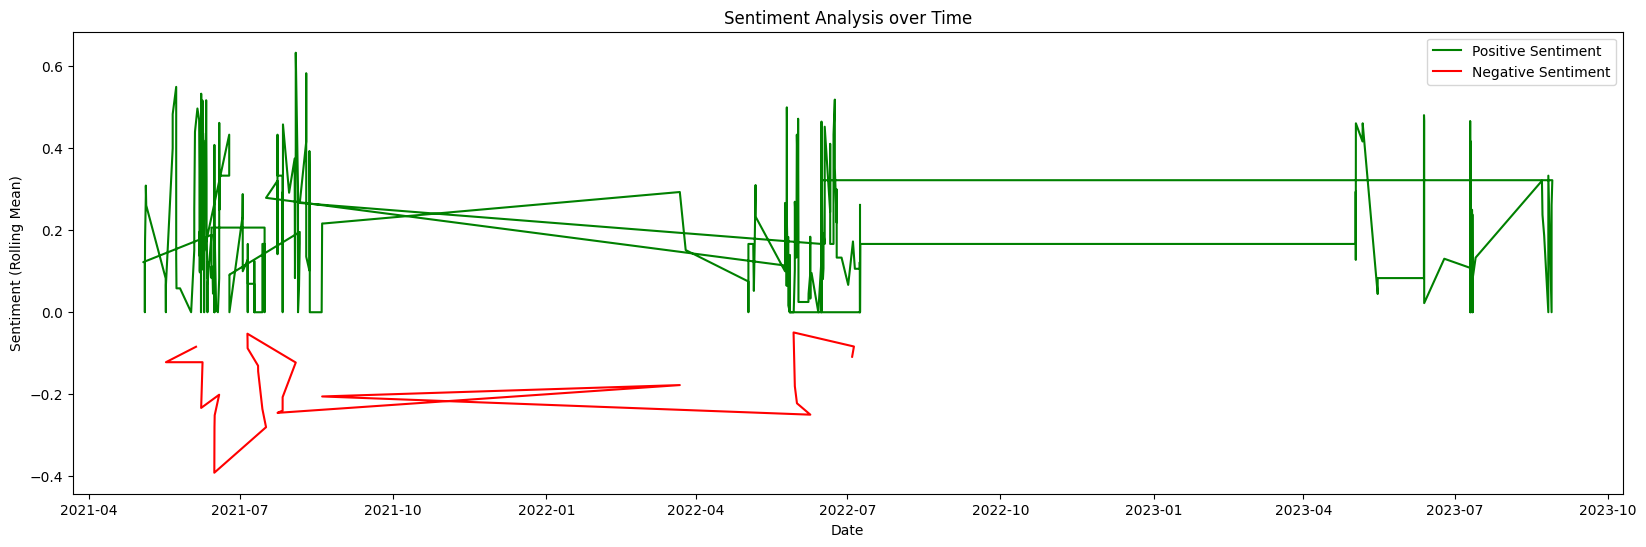

In [114]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(20, 6))

# Create a new column for sentiment group
df_messages['sentiment_group'] = df_messages['sentiment'].apply(lambda s: 'Positive' if s >= 0 else 'Negative')

# Filter positive sentiment data
positive_sentiment_resampled = df_messages[df_messages['sentiment_group'] == 'Positive']
positive_sentiment_resampled = positive_sentiment_resampled['sentiment'].rolling(window=3).mean()

# Filter negative sentiment data
negative_sentiment_resampled = df_messages[df_messages['sentiment_group'] == 'Negative']
negative_sentiment_resampled = negative_sentiment_resampled['sentiment'].rolling(window=3).mean()

# Plot positive sentiment data
plt.plot(positive_sentiment_resampled, label='Positive Sentiment', color='green')

# Plot negative sentiment data
plt.plot(negative_sentiment_resampled, label='Negative Sentiment', color='red')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Sentiment (Rolling Mean)')
plt.title('Sentiment Analysis over Time')
plt.legend()

# Show the plot
plt.show()


In [125]:
df_messages["m"]

timestamp
2022-07-08 12:56:32.153    I'm online now. So if anyone else wants to joi...
2022-07-08 13:00:16.704    I'll be watching, not in shape to be on stream...
2022-07-08 13:49:40.113                                          Ah! Thanks!
2022-07-08 13:49:46.348                        Didn't see this until now ...
2022-07-08 13:49:47.355                                               bummer
                                                 ...                        
2021-06-04 10:40:55.118    hi, last week of june is complicated to me bec...
2021-06-05 06:59:05.833           Sure! We can move around without limits. 🙂
2021-06-06 07:58:08.248    OK, thanks! So I see week 27 has empty spots, ...
2021-06-06 12:14:23.585    Absolutely, <@!720956745194930197> is in charg...
2021-06-06 13:22:14.736    Hi Fredrik, I will be getting my second shot o...
Name: m, Length: 488, dtype: object

## Multiple Categorization using Compound

In [132]:
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

# Assuming df_messages is your DataFrame with the 'm' column
# and SentimentIntensityAnalyzer is imported
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

# Convert the "m" column to strings
df_messages["m"] = df_messages["m"].astype(str)

# Apply sentiment analysis and create a new column for polarity scores
df_messages["Polarity Scores"] = df_messages["m"].apply(lambda x: sid.polarity_scores(x))

# Extract the compound score from the dictionary
df_messages["Compound Score"] = df_messages["Polarity Scores"].apply(lambda x: x["compound"])

# Define a function to categorize sentiment labels
def sentiment_label(x):
    if x > 0.05:
        return "Positive"
    elif x < -0.05:
        return "Negative"
    else: 
        return "Neutral"

# Apply the sentiment_label function to create a new column for sentiment labels
df_messages["Sentiment_Label"] = df_messages["Compound Score"].apply(lambda x: sentiment_label(x))



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/nemaaa/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


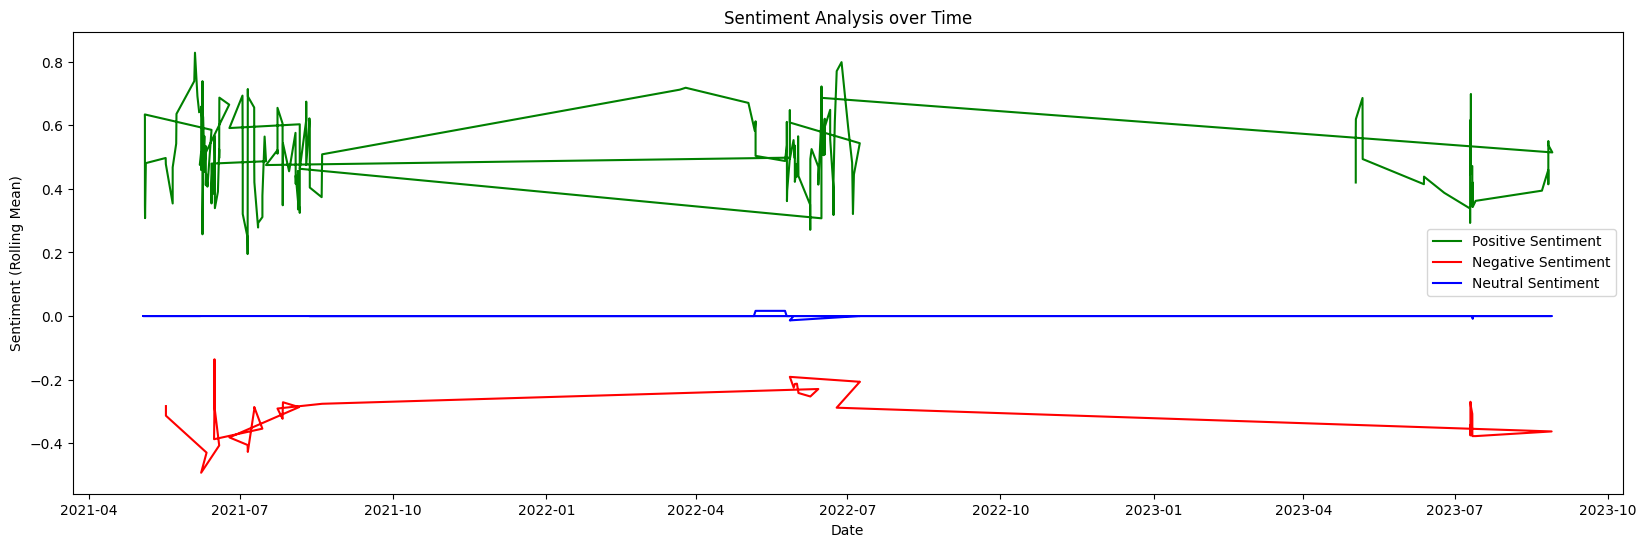

In [133]:
# Set the figure size
plt.figure(figsize=(20, 6))

# Plot each sentiment group
for sentiment_group, color in [('Positive', 'green'), ('Negative', 'red'), ('Neutral', 'blue')]:
    sentiment_resampled = df_messages[df_messages['Sentiment_Label'] == sentiment_group]
    sentiment_resampled = sentiment_resampled['Compound Score'].rolling(window=3).mean()
    plt.plot(sentiment_resampled, label=f'{sentiment_group} Sentiment', color=color)

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Sentiment (Rolling Mean)')
plt.title('Sentiment Analysis over Time')
plt.legend()

# Show the plot
plt.show()

In [80]:
sentiment_resampled[sentiment_resampled.index.year == 2021]

timestamp
2021-02-21 10:00:00    0.000000
2021-03-13 14:00:00    0.156250
2021-04-26 16:00:00    0.800000
2021-05-03 17:00:00    0.000000
2021-05-04 15:00:00    0.000000
                         ...   
2021-08-12 20:00:00    0.000000
2021-08-13 12:00:00    0.000000
2021-08-18 23:00:00    0.000000
2021-08-19 06:00:00    0.191667
2021-08-20 08:00:00    0.000000
Name: sentiment, Length: 106, dtype: float64

In [72]:
import openai

openai.api_key = 'APIKey'
response = openai.ChatCompletion.create(
      model="gpt-3.5-turbo",
      messages=[
            {"role": "system", "content": "You are an assistant that can analyze the sentiment of a piece of text. Give your answer as one word only but not just positive or negative."},
            {"role": "user", "content": f"What's the sentiment of the following text: 'TESTING YOU HAHAHA'"}
        ]
    )

# Extract only the assistant's reply
sentiment = response['choices'][0]['message']['content']
print(sentiment)

Amusement


## Update your API KEY for Open AI here:

In [73]:
import openai

openai.api_key = 'APIKey'

def get_sentiment(message):
    response = openai.ChatCompletion.create(
      model="gpt-3.5-turbo",
      messages=[
            {"role": "system", "content": "You are an assistant that can analyze the sentiment of a piece of text. Give your answer as one word only but not just positive or negative."},
            {"role": "user", "content": f"What's the sentiment of the following text: '{message}'"}
        ]
    )

    # Extract only the assistant's reply
    sentiment = response['choices'][0]['message']['content']

    return sentiment

df_messages_subset = df_messages[1:100]
df_messages_subset['gpt_sentiment'] = df_messages_subset['message'].apply(get_sentiment)

/var/folders/bl/02tnlb3j63n87b_hctf4mh380000gq/T/ipykernel_19079/187036867.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_messages_subset['gpt_sentiment'] = df_messages_subset['message'].apply(get_sentiment)


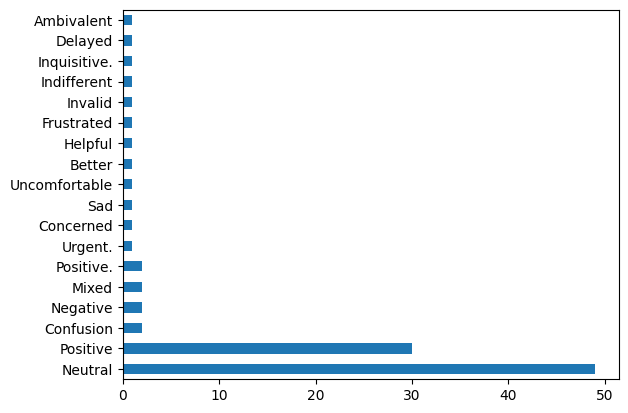

In [63]:
df_messages_subset['gpt_sentiment'].value_counts().plot.barh()
plt.show()